# Preprocessing - Part II

### Steps included:
* reading song & artist combined data
* cleaning data
* generating cosine similarity matrix
* generating top 10 recommenxations for each song
* saving recommendations as a matrix for fast loading

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#### Loading songs artist combined file

In [2]:
df = pd.read_csv("song_artist.csv")
df.head()

,id,name,artists,acousticness,danceability,energy,instrumentalness,liveness,speechiness,spotify_id,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0,Blinding Lights,The Weeknd,0.00146,0.514,0.730,0.000095,0.0897,0.0598,0VjIjW4GlUZAMYd2vXMi3b,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811
1,1,ROCKSTAR (feat. Roddy Ricch),DaBaby,0.24700,0.746,0.690,0.000000,0.1010,0.1640,7ytR5pFWmSjzHJIeQkgog4,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725
2,2,death bed (coffee for your head) (feat. beabad...,Powfu,0.73100,0.726,0.431,0.000000,0.6960,0.1350,7eJMfftS33KTjuF7lTsMCx,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
3,3,THE SCOTTS,THE SCOTTS,0.23300,0.716,0.537,0.000000,0.1570,0.0514,39Yp9wwQiSRIDOvrVg7mbk,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
4,4,Supalonely,BENEE,0.30500,0.863,0.631,0.000030,0.1230,0.0534,4nK5YrxbMGZstTLbvj6Gxw,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


#### Separating numerical attributes & meta

In [3]:
song_id = df[["id", "name", "artists", "spotify_id"]]

In [4]:
data = df.drop(["id", "name", "artists", "acousticness", "danceability", "spotify_id"], axis = 1).copy()
data.head()

,energy,instrumentalness,liveness,speechiness,acousticness_artist,danceability_artist,energy_artist,instrumentalness_artist,liveness_artist,speechiness_artist
0,0.730,0.000095,0.0897,0.0598,0.271439,0.574808,0.607873,0.010594,0.201728,0.086811
1,0.690,0.000000,0.1010,0.1640,0.093113,0.829283,0.657626,0.000002,0.170425,0.284725
2,0.431,0.000000,0.6960,0.1350,0.393250,0.809500,0.408750,0.000062,0.234088,0.131225
3,0.537,0.000000,0.1570,0.0514,0.307500,0.706500,0.521000,0.000000,0.159000,0.052050
4,0.631,0.000030,0.1230,0.0534,0.345733,0.757444,0.574333,0.000010,0.145644,0.041956


#### Corelation between numerical attributes

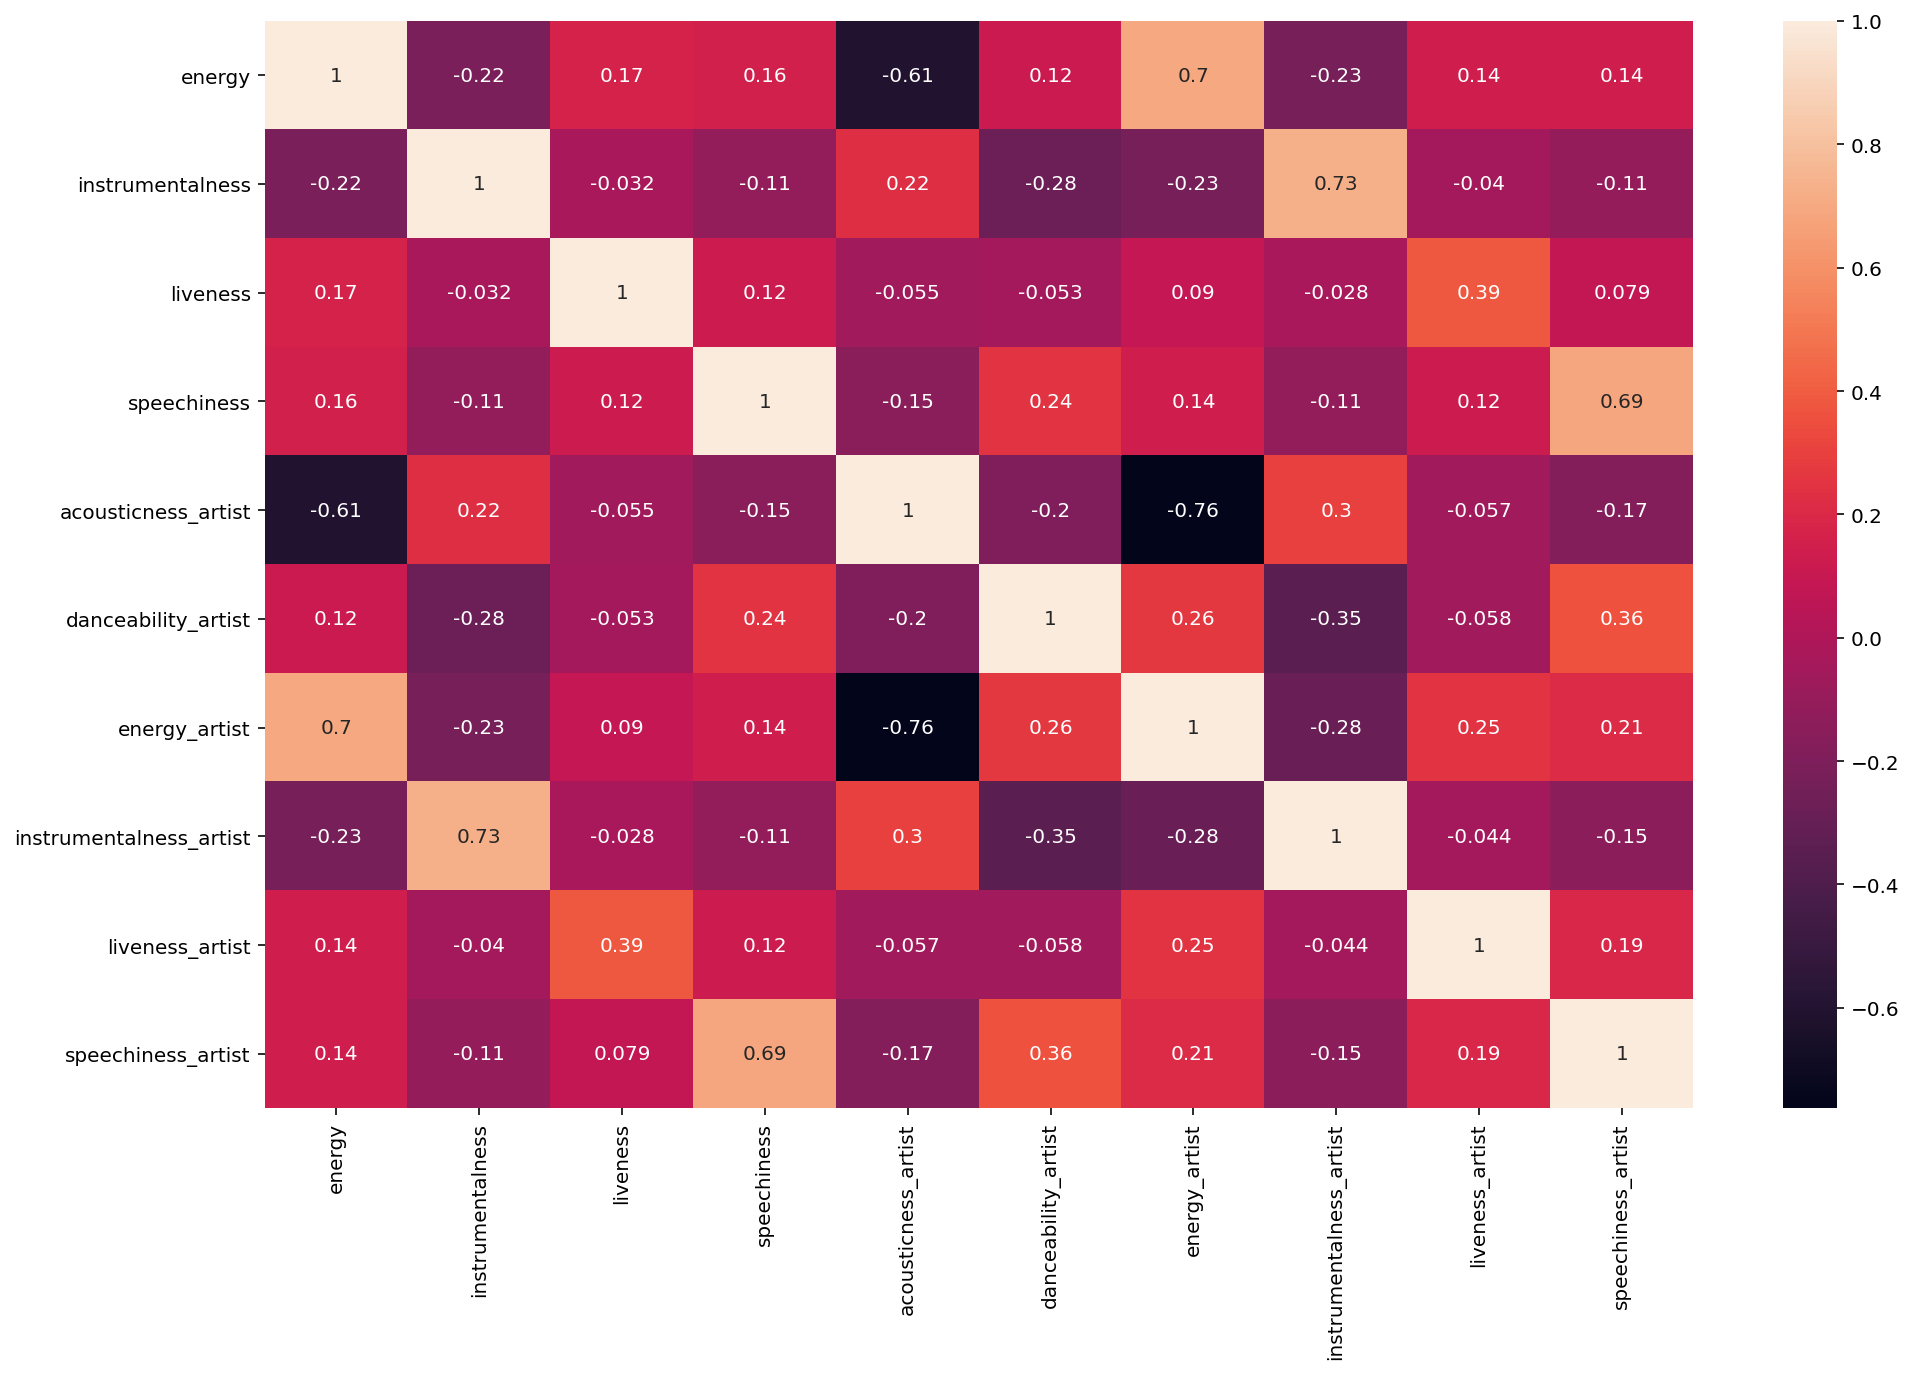

In [5]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)

#### Limiting dataset to 40,000 songs because of memory contraints

In [6]:
meta = data.values
meta = meta[:40000, :]
meta.shape

(40000, 10)

#### Generating cosine similarity matrix
The following three cells will take significant time to execute

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(meta, meta)

In [8]:
np.save("sim.npy", cosine_sim)

In [9]:
song_id["search"] = song_id["name"] + ' ' + song_id["artists"]
song_id.to_csv("id2.csv", index=False)

<ipython-input-9-a18ec5aca9d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  song_id["search"] = song_id["name"] + ' ' + song_id["artists"]


#### Finding top 10 similar songs for a given song and saving them in a matrix

In [10]:
def get_recommendations(idx, cosine_sim):
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the songs based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar songs
    sim_scores = sim_scores[1:11]
    sim_scores.sort()
    # Get the song indices
    song_index = [i[0] for i in sim_scores]
    song_index = song_index
    
    # Return the top 10 most similar songs
    return song_index


sim = np.load("sim.npy")
all_res = np.zeros((1, 10))

for i in range(0, 40000):
    rec_list = get_recommendations(i, sim)
    rec_array = np.array(rec_list)
    rec_array = rec_array.reshape((1, 10))
    rec_array = rec_array.astype(int)
    all_res = np.append(all_res, rec_array, axis=0)
    print("saved for:" + str(i))

all_res = np.delete(all_res, 0, axis=0)
np.save("light.npy", all_res)

saved for:0
saved for:1
saved for:2
saved for:3
saved for:4
saved for:5
saved for:6
saved for:7
saved for:8
saved for:9
saved for:10
saved for:11
saved for:12
saved for:13
saved for:14
saved for:15
saved for:16
saved for:17
saved for:18
saved for:19
saved for:20
saved for:21
saved for:22
saved for:23
saved for:24
saved for:25
saved for:26
saved for:27
saved for:28
saved for:29
saved for:30
saved for:31
saved for:32
saved for:33
saved for:34
saved for:35
saved for:36
saved for:37
saved for:38
saved for:39
saved for:40
saved for:41
saved for:42
saved for:43
saved for:44
saved for:45
saved for:46
saved for:47
saved for:48
saved for:49
saved for:50
saved for:51
saved for:52
saved for:53
saved for:54
saved for:55
saved for:56
saved for:57
saved for:58
saved for:59
saved for:60
saved for:61
saved for:62
saved for:63
saved for:64
saved for:65
saved for:66
saved for:67
saved for:68
saved for:69
saved for:70
saved for:71
saved for:72
saved for:73
saved for:74
saved for:75
saved for:76
saved for

saved for:594
saved for:595
saved for:596
saved for:597
saved for:598
saved for:599
saved for:600
saved for:601
saved for:602
saved for:603
saved for:604
saved for:605
saved for:606
saved for:607
saved for:608
saved for:609
saved for:610
saved for:611
saved for:612
saved for:613
saved for:614
saved for:615
saved for:616
saved for:617
saved for:618
saved for:619
saved for:620
saved for:621
saved for:622
saved for:623
saved for:624
saved for:625
saved for:626
saved for:627
saved for:628
saved for:629
saved for:630
saved for:631
saved for:632
saved for:633
saved for:634
saved for:635
saved for:636
saved for:637
saved for:638
saved for:639
saved for:640
saved for:641
saved for:642
saved for:643
saved for:644
saved for:645
saved for:646
saved for:647
saved for:648
saved for:649
saved for:650
saved for:651
saved for:652
saved for:653
saved for:654
saved for:655
saved for:656
saved for:657
saved for:658
saved for:659
saved for:660
saved for:661
saved for:662
saved for:663
saved for:664
saved 

saved for:1169
saved for:1170
saved for:1171
saved for:1172
saved for:1173
saved for:1174
saved for:1175
saved for:1176
saved for:1177
saved for:1178
saved for:1179
saved for:1180
saved for:1181
saved for:1182
saved for:1183
saved for:1184
saved for:1185
saved for:1186
saved for:1187
saved for:1188
saved for:1189
saved for:1190
saved for:1191
saved for:1192
saved for:1193
saved for:1194
saved for:1195
saved for:1196
saved for:1197
saved for:1198
saved for:1199
saved for:1200
saved for:1201
saved for:1202
saved for:1203
saved for:1204
saved for:1205
saved for:1206
saved for:1207
saved for:1208
saved for:1209
saved for:1210
saved for:1211
saved for:1212
saved for:1213
saved for:1214
saved for:1215
saved for:1216
saved for:1217
saved for:1218
saved for:1219
saved for:1220
saved for:1221
saved for:1222
saved for:1223
saved for:1224
saved for:1225
saved for:1226
saved for:1227
saved for:1228
saved for:1229
saved for:1230
saved for:1231
saved for:1232
saved for:1233
saved for:1234
saved for:

saved for:1721
saved for:1722
saved for:1723
saved for:1724
saved for:1725
saved for:1726
saved for:1727
saved for:1728
saved for:1729
saved for:1730
saved for:1731
saved for:1732
saved for:1733
saved for:1734
saved for:1735
saved for:1736
saved for:1737
saved for:1738
saved for:1739
saved for:1740
saved for:1741
saved for:1742
saved for:1743
saved for:1744
saved for:1745
saved for:1746
saved for:1747
saved for:1748
saved for:1749
saved for:1750
saved for:1751
saved for:1752
saved for:1753
saved for:1754
saved for:1755
saved for:1756
saved for:1757
saved for:1758
saved for:1759
saved for:1760
saved for:1761
saved for:1762
saved for:1763
saved for:1764
saved for:1765
saved for:1766
saved for:1767
saved for:1768
saved for:1769
saved for:1770
saved for:1771
saved for:1772
saved for:1773
saved for:1774
saved for:1775
saved for:1776
saved for:1777
saved for:1778
saved for:1779
saved for:1780
saved for:1781
saved for:1782
saved for:1783
saved for:1784
saved for:1785
saved for:1786
saved for:

saved for:2269
saved for:2270
saved for:2271
saved for:2272
saved for:2273
saved for:2274
saved for:2275
saved for:2276
saved for:2277
saved for:2278
saved for:2279
saved for:2280
saved for:2281
saved for:2282
saved for:2283
saved for:2284
saved for:2285
saved for:2286
saved for:2287
saved for:2288
saved for:2289
saved for:2290
saved for:2291
saved for:2292
saved for:2293
saved for:2294
saved for:2295
saved for:2296
saved for:2297
saved for:2298
saved for:2299
saved for:2300
saved for:2301
saved for:2302
saved for:2303
saved for:2304
saved for:2305
saved for:2306
saved for:2307
saved for:2308
saved for:2309
saved for:2310
saved for:2311
saved for:2312
saved for:2313
saved for:2314
saved for:2315
saved for:2316
saved for:2317
saved for:2318
saved for:2319
saved for:2320
saved for:2321
saved for:2322
saved for:2323
saved for:2324
saved for:2325
saved for:2326
saved for:2327
saved for:2328
saved for:2329
saved for:2330
saved for:2331
saved for:2332
saved for:2333
saved for:2334
saved for:

saved for:2824
saved for:2825
saved for:2826
saved for:2827
saved for:2828
saved for:2829
saved for:2830
saved for:2831
saved for:2832
saved for:2833
saved for:2834
saved for:2835
saved for:2836
saved for:2837
saved for:2838
saved for:2839
saved for:2840
saved for:2841
saved for:2842
saved for:2843
saved for:2844
saved for:2845
saved for:2846
saved for:2847
saved for:2848
saved for:2849
saved for:2850
saved for:2851
saved for:2852
saved for:2853
saved for:2854
saved for:2855
saved for:2856
saved for:2857
saved for:2858
saved for:2859
saved for:2860
saved for:2861
saved for:2862
saved for:2863
saved for:2864
saved for:2865
saved for:2866
saved for:2867
saved for:2868
saved for:2869
saved for:2870
saved for:2871
saved for:2872
saved for:2873
saved for:2874
saved for:2875
saved for:2876
saved for:2877
saved for:2878
saved for:2879
saved for:2880
saved for:2881
saved for:2882
saved for:2883
saved for:2884
saved for:2885
saved for:2886
saved for:2887
saved for:2888
saved for:2889
saved for:

saved for:3372
saved for:3373
saved for:3374
saved for:3375
saved for:3376
saved for:3377
saved for:3378
saved for:3379
saved for:3380
saved for:3381
saved for:3382
saved for:3383
saved for:3384
saved for:3385
saved for:3386
saved for:3387
saved for:3388
saved for:3389
saved for:3390
saved for:3391
saved for:3392
saved for:3393
saved for:3394
saved for:3395
saved for:3396
saved for:3397
saved for:3398
saved for:3399
saved for:3400
saved for:3401
saved for:3402
saved for:3403
saved for:3404
saved for:3405
saved for:3406
saved for:3407
saved for:3408
saved for:3409
saved for:3410
saved for:3411
saved for:3412
saved for:3413
saved for:3414
saved for:3415
saved for:3416
saved for:3417
saved for:3418
saved for:3419
saved for:3420
saved for:3421
saved for:3422
saved for:3423
saved for:3424
saved for:3425
saved for:3426
saved for:3427
saved for:3428
saved for:3429
saved for:3430
saved for:3431
saved for:3432
saved for:3433
saved for:3434
saved for:3435
saved for:3436
saved for:3437
saved for:

saved for:3920
saved for:3921
saved for:3922
saved for:3923
saved for:3924
saved for:3925
saved for:3926
saved for:3927
saved for:3928
saved for:3929
saved for:3930
saved for:3931
saved for:3932
saved for:3933
saved for:3934
saved for:3935
saved for:3936
saved for:3937
saved for:3938
saved for:3939
saved for:3940
saved for:3941
saved for:3942
saved for:3943
saved for:3944
saved for:3945
saved for:3946
saved for:3947
saved for:3948
saved for:3949
saved for:3950
saved for:3951
saved for:3952
saved for:3953
saved for:3954
saved for:3955
saved for:3956
saved for:3957
saved for:3958
saved for:3959
saved for:3960
saved for:3961
saved for:3962
saved for:3963
saved for:3964
saved for:3965
saved for:3966
saved for:3967
saved for:3968
saved for:3969
saved for:3970
saved for:3971
saved for:3972
saved for:3973
saved for:3974
saved for:3975
saved for:3976
saved for:3977
saved for:3978
saved for:3979
saved for:3980
saved for:3981
saved for:3982
saved for:3983
saved for:3984
saved for:3985
saved for:

saved for:4476
saved for:4477
saved for:4478
saved for:4479
saved for:4480
saved for:4481
saved for:4482
saved for:4483
saved for:4484
saved for:4485
saved for:4486
saved for:4487
saved for:4488
saved for:4489
saved for:4490
saved for:4491
saved for:4492
saved for:4493
saved for:4494
saved for:4495
saved for:4496
saved for:4497
saved for:4498
saved for:4499
saved for:4500
saved for:4501
saved for:4502
saved for:4503
saved for:4504
saved for:4505
saved for:4506
saved for:4507
saved for:4508
saved for:4509
saved for:4510
saved for:4511
saved for:4512
saved for:4513
saved for:4514
saved for:4515
saved for:4516
saved for:4517
saved for:4518
saved for:4519
saved for:4520
saved for:4521
saved for:4522
saved for:4523
saved for:4524
saved for:4525
saved for:4526
saved for:4527
saved for:4528
saved for:4529
saved for:4530
saved for:4531
saved for:4532
saved for:4533
saved for:4534
saved for:4535
saved for:4536
saved for:4537
saved for:4538
saved for:4539
saved for:4540
saved for:4541
saved for:

saved for:5029
saved for:5030
saved for:5031
saved for:5032
saved for:5033
saved for:5034
saved for:5035
saved for:5036
saved for:5037
saved for:5038
saved for:5039
saved for:5040
saved for:5041
saved for:5042
saved for:5043
saved for:5044
saved for:5045
saved for:5046
saved for:5047
saved for:5048
saved for:5049
saved for:5050
saved for:5051
saved for:5052
saved for:5053
saved for:5054
saved for:5055
saved for:5056
saved for:5057
saved for:5058
saved for:5059
saved for:5060
saved for:5061
saved for:5062
saved for:5063
saved for:5064
saved for:5065
saved for:5066
saved for:5067
saved for:5068
saved for:5069
saved for:5070
saved for:5071
saved for:5072
saved for:5073
saved for:5074
saved for:5075
saved for:5076
saved for:5077
saved for:5078
saved for:5079
saved for:5080
saved for:5081
saved for:5082
saved for:5083
saved for:5084
saved for:5085
saved for:5086
saved for:5087
saved for:5088
saved for:5089
saved for:5090
saved for:5091
saved for:5092
saved for:5093
saved for:5094
saved for:

saved for:5578
saved for:5579
saved for:5580
saved for:5581
saved for:5582
saved for:5583
saved for:5584
saved for:5585
saved for:5586
saved for:5587
saved for:5588
saved for:5589
saved for:5590
saved for:5591
saved for:5592
saved for:5593
saved for:5594
saved for:5595
saved for:5596
saved for:5597
saved for:5598
saved for:5599
saved for:5600
saved for:5601
saved for:5602
saved for:5603
saved for:5604
saved for:5605
saved for:5606
saved for:5607
saved for:5608
saved for:5609
saved for:5610
saved for:5611
saved for:5612
saved for:5613
saved for:5614
saved for:5615
saved for:5616
saved for:5617
saved for:5618
saved for:5619
saved for:5620
saved for:5621
saved for:5622
saved for:5623
saved for:5624
saved for:5625
saved for:5626
saved for:5627
saved for:5628
saved for:5629
saved for:5630
saved for:5631
saved for:5632
saved for:5633
saved for:5634
saved for:5635
saved for:5636
saved for:5637
saved for:5638
saved for:5639
saved for:5640
saved for:5641
saved for:5642
saved for:5643
saved for:

saved for:6131
saved for:6132
saved for:6133
saved for:6134
saved for:6135
saved for:6136
saved for:6137
saved for:6138
saved for:6139
saved for:6140
saved for:6141
saved for:6142
saved for:6143
saved for:6144
saved for:6145
saved for:6146
saved for:6147
saved for:6148
saved for:6149
saved for:6150
saved for:6151
saved for:6152
saved for:6153
saved for:6154
saved for:6155
saved for:6156
saved for:6157
saved for:6158
saved for:6159
saved for:6160
saved for:6161
saved for:6162
saved for:6163
saved for:6164
saved for:6165
saved for:6166
saved for:6167
saved for:6168
saved for:6169
saved for:6170
saved for:6171
saved for:6172
saved for:6173
saved for:6174
saved for:6175
saved for:6176
saved for:6177
saved for:6178
saved for:6179
saved for:6180
saved for:6181
saved for:6182
saved for:6183
saved for:6184
saved for:6185
saved for:6186
saved for:6187
saved for:6188
saved for:6189
saved for:6190
saved for:6191
saved for:6192
saved for:6193
saved for:6194
saved for:6195
saved for:6196
saved for:

saved for:6686
saved for:6687
saved for:6688
saved for:6689
saved for:6690
saved for:6691
saved for:6692
saved for:6693
saved for:6694
saved for:6695
saved for:6696
saved for:6697
saved for:6698
saved for:6699
saved for:6700
saved for:6701
saved for:6702
saved for:6703
saved for:6704
saved for:6705
saved for:6706
saved for:6707
saved for:6708
saved for:6709
saved for:6710
saved for:6711
saved for:6712
saved for:6713
saved for:6714
saved for:6715
saved for:6716
saved for:6717
saved for:6718
saved for:6719
saved for:6720
saved for:6721
saved for:6722
saved for:6723
saved for:6724
saved for:6725
saved for:6726
saved for:6727
saved for:6728
saved for:6729
saved for:6730
saved for:6731
saved for:6732
saved for:6733
saved for:6734
saved for:6735
saved for:6736
saved for:6737
saved for:6738
saved for:6739
saved for:6740
saved for:6741
saved for:6742
saved for:6743
saved for:6744
saved for:6745
saved for:6746
saved for:6747
saved for:6748
saved for:6749
saved for:6750
saved for:6751
saved for:

saved for:7240
saved for:7241
saved for:7242
saved for:7243
saved for:7244
saved for:7245
saved for:7246
saved for:7247
saved for:7248
saved for:7249
saved for:7250
saved for:7251
saved for:7252
saved for:7253
saved for:7254
saved for:7255
saved for:7256
saved for:7257
saved for:7258
saved for:7259
saved for:7260
saved for:7261
saved for:7262
saved for:7263
saved for:7264
saved for:7265
saved for:7266
saved for:7267
saved for:7268
saved for:7269
saved for:7270
saved for:7271
saved for:7272
saved for:7273
saved for:7274
saved for:7275
saved for:7276
saved for:7277
saved for:7278
saved for:7279
saved for:7280
saved for:7281
saved for:7282
saved for:7283
saved for:7284
saved for:7285
saved for:7286
saved for:7287
saved for:7288
saved for:7289
saved for:7290
saved for:7291
saved for:7292
saved for:7293
saved for:7294
saved for:7295
saved for:7296
saved for:7297
saved for:7298
saved for:7299
saved for:7300
saved for:7301
saved for:7302
saved for:7303
saved for:7304
saved for:7305
saved for:

saved for:7789
saved for:7790
saved for:7791
saved for:7792
saved for:7793
saved for:7794
saved for:7795
saved for:7796
saved for:7797
saved for:7798
saved for:7799
saved for:7800
saved for:7801
saved for:7802
saved for:7803
saved for:7804
saved for:7805
saved for:7806
saved for:7807
saved for:7808
saved for:7809
saved for:7810
saved for:7811
saved for:7812
saved for:7813
saved for:7814
saved for:7815
saved for:7816
saved for:7817
saved for:7818
saved for:7819
saved for:7820
saved for:7821
saved for:7822
saved for:7823
saved for:7824
saved for:7825
saved for:7826
saved for:7827
saved for:7828
saved for:7829
saved for:7830
saved for:7831
saved for:7832
saved for:7833
saved for:7834
saved for:7835
saved for:7836
saved for:7837
saved for:7838
saved for:7839
saved for:7840
saved for:7841
saved for:7842
saved for:7843
saved for:7844
saved for:7845
saved for:7846
saved for:7847
saved for:7848
saved for:7849
saved for:7850
saved for:7851
saved for:7852
saved for:7853
saved for:7854
saved for:

saved for:8342
saved for:8343
saved for:8344
saved for:8345
saved for:8346
saved for:8347
saved for:8348
saved for:8349
saved for:8350
saved for:8351
saved for:8352
saved for:8353
saved for:8354
saved for:8355
saved for:8356
saved for:8357
saved for:8358
saved for:8359
saved for:8360
saved for:8361
saved for:8362
saved for:8363
saved for:8364
saved for:8365
saved for:8366
saved for:8367
saved for:8368
saved for:8369
saved for:8370
saved for:8371
saved for:8372
saved for:8373
saved for:8374
saved for:8375
saved for:8376
saved for:8377
saved for:8378
saved for:8379
saved for:8380
saved for:8381
saved for:8382
saved for:8383
saved for:8384
saved for:8385
saved for:8386
saved for:8387
saved for:8388
saved for:8389
saved for:8390
saved for:8391
saved for:8392
saved for:8393
saved for:8394
saved for:8395
saved for:8396
saved for:8397
saved for:8398
saved for:8399
saved for:8400
saved for:8401
saved for:8402
saved for:8403
saved for:8404
saved for:8405
saved for:8406
saved for:8407
saved for:

saved for:8892
saved for:8893
saved for:8894
saved for:8895
saved for:8896
saved for:8897
saved for:8898
saved for:8899
saved for:8900
saved for:8901
saved for:8902
saved for:8903
saved for:8904
saved for:8905
saved for:8906
saved for:8907
saved for:8908
saved for:8909
saved for:8910
saved for:8911
saved for:8912
saved for:8913
saved for:8914
saved for:8915
saved for:8916
saved for:8917
saved for:8918
saved for:8919
saved for:8920
saved for:8921
saved for:8922
saved for:8923
saved for:8924
saved for:8925
saved for:8926
saved for:8927
saved for:8928
saved for:8929
saved for:8930
saved for:8931
saved for:8932
saved for:8933
saved for:8934
saved for:8935
saved for:8936
saved for:8937
saved for:8938
saved for:8939
saved for:8940
saved for:8941
saved for:8942
saved for:8943
saved for:8944
saved for:8945
saved for:8946
saved for:8947
saved for:8948
saved for:8949
saved for:8950
saved for:8951
saved for:8952
saved for:8953
saved for:8954
saved for:8955
saved for:8956
saved for:8957
saved for:

saved for:9439
saved for:9440
saved for:9441
saved for:9442
saved for:9443
saved for:9444
saved for:9445
saved for:9446
saved for:9447
saved for:9448
saved for:9449
saved for:9450
saved for:9451
saved for:9452
saved for:9453
saved for:9454
saved for:9455
saved for:9456
saved for:9457
saved for:9458
saved for:9459
saved for:9460
saved for:9461
saved for:9462
saved for:9463
saved for:9464
saved for:9465
saved for:9466
saved for:9467
saved for:9468
saved for:9469
saved for:9470
saved for:9471
saved for:9472
saved for:9473
saved for:9474
saved for:9475
saved for:9476
saved for:9477
saved for:9478
saved for:9479
saved for:9480
saved for:9481
saved for:9482
saved for:9483
saved for:9484
saved for:9485
saved for:9486
saved for:9487
saved for:9488
saved for:9489
saved for:9490
saved for:9491
saved for:9492
saved for:9493
saved for:9494
saved for:9495
saved for:9496
saved for:9497
saved for:9498
saved for:9499
saved for:9500
saved for:9501
saved for:9502
saved for:9503
saved for:9504
saved for:

saved for:9987
saved for:9988
saved for:9989
saved for:9990
saved for:9991
saved for:9992
saved for:9993
saved for:9994
saved for:9995
saved for:9996
saved for:9997
saved for:9998
saved for:9999
saved for:10000
saved for:10001
saved for:10002
saved for:10003
saved for:10004
saved for:10005
saved for:10006
saved for:10007
saved for:10008
saved for:10009
saved for:10010
saved for:10011
saved for:10012
saved for:10013
saved for:10014
saved for:10015
saved for:10016
saved for:10017
saved for:10018
saved for:10019
saved for:10020
saved for:10021
saved for:10022
saved for:10023
saved for:10024
saved for:10025
saved for:10026
saved for:10027
saved for:10028
saved for:10029
saved for:10030
saved for:10031
saved for:10032
saved for:10033
saved for:10034
saved for:10035
saved for:10036
saved for:10037
saved for:10038
saved for:10039
saved for:10040
saved for:10041
saved for:10042
saved for:10043
saved for:10044
saved for:10045
saved for:10046
saved for:10047
saved for:10048
saved for:10049
saved

saved for:10506
saved for:10507
saved for:10508
saved for:10509
saved for:10510
saved for:10511
saved for:10512
saved for:10513
saved for:10514
saved for:10515
saved for:10516
saved for:10517
saved for:10518
saved for:10519
saved for:10520
saved for:10521
saved for:10522
saved for:10523
saved for:10524
saved for:10525
saved for:10526
saved for:10527
saved for:10528
saved for:10529
saved for:10530
saved for:10531
saved for:10532
saved for:10533
saved for:10534
saved for:10535
saved for:10536
saved for:10537
saved for:10538
saved for:10539
saved for:10540
saved for:10541
saved for:10542
saved for:10543
saved for:10544
saved for:10545
saved for:10546
saved for:10547
saved for:10548
saved for:10549
saved for:10550
saved for:10551
saved for:10552
saved for:10553
saved for:10554
saved for:10555
saved for:10556
saved for:10557
saved for:10558
saved for:10559
saved for:10560
saved for:10561
saved for:10562
saved for:10563
saved for:10564
saved for:10565
saved for:10566
saved for:10567
saved fo

saved for:11026
saved for:11027
saved for:11028
saved for:11029
saved for:11030
saved for:11031
saved for:11032
saved for:11033
saved for:11034
saved for:11035
saved for:11036
saved for:11037
saved for:11038
saved for:11039
saved for:11040
saved for:11041
saved for:11042
saved for:11043
saved for:11044
saved for:11045
saved for:11046
saved for:11047
saved for:11048
saved for:11049
saved for:11050
saved for:11051
saved for:11052
saved for:11053
saved for:11054
saved for:11055
saved for:11056
saved for:11057
saved for:11058
saved for:11059
saved for:11060
saved for:11061
saved for:11062
saved for:11063
saved for:11064
saved for:11065
saved for:11066
saved for:11067
saved for:11068
saved for:11069
saved for:11070
saved for:11071
saved for:11072
saved for:11073
saved for:11074
saved for:11075
saved for:11076
saved for:11077
saved for:11078
saved for:11079
saved for:11080
saved for:11081
saved for:11082
saved for:11083
saved for:11084
saved for:11085
saved for:11086
saved for:11087
saved fo

saved for:11543
saved for:11544
saved for:11545
saved for:11546
saved for:11547
saved for:11548
saved for:11549
saved for:11550
saved for:11551
saved for:11552
saved for:11553
saved for:11554
saved for:11555
saved for:11556
saved for:11557
saved for:11558
saved for:11559
saved for:11560
saved for:11561
saved for:11562
saved for:11563
saved for:11564
saved for:11565
saved for:11566
saved for:11567
saved for:11568
saved for:11569
saved for:11570
saved for:11571
saved for:11572
saved for:11573
saved for:11574
saved for:11575
saved for:11576
saved for:11577
saved for:11578
saved for:11579
saved for:11580
saved for:11581
saved for:11582
saved for:11583
saved for:11584
saved for:11585
saved for:11586
saved for:11587
saved for:11588
saved for:11589
saved for:11590
saved for:11591
saved for:11592
saved for:11593
saved for:11594
saved for:11595
saved for:11596
saved for:11597
saved for:11598
saved for:11599
saved for:11600
saved for:11601
saved for:11602
saved for:11603
saved for:11604
saved fo

saved for:12061
saved for:12062
saved for:12063
saved for:12064
saved for:12065
saved for:12066
saved for:12067
saved for:12068
saved for:12069
saved for:12070
saved for:12071
saved for:12072
saved for:12073
saved for:12074
saved for:12075
saved for:12076
saved for:12077
saved for:12078
saved for:12079
saved for:12080
saved for:12081
saved for:12082
saved for:12083
saved for:12084
saved for:12085
saved for:12086
saved for:12087
saved for:12088
saved for:12089
saved for:12090
saved for:12091
saved for:12092
saved for:12093
saved for:12094
saved for:12095
saved for:12096
saved for:12097
saved for:12098
saved for:12099
saved for:12100
saved for:12101
saved for:12102
saved for:12103
saved for:12104
saved for:12105
saved for:12106
saved for:12107
saved for:12108
saved for:12109
saved for:12110
saved for:12111
saved for:12112
saved for:12113
saved for:12114
saved for:12115
saved for:12116
saved for:12117
saved for:12118
saved for:12119
saved for:12120
saved for:12121
saved for:12122
saved fo

saved for:12580
saved for:12581
saved for:12582
saved for:12583
saved for:12584
saved for:12585
saved for:12586
saved for:12587
saved for:12588
saved for:12589
saved for:12590
saved for:12591
saved for:12592
saved for:12593
saved for:12594
saved for:12595
saved for:12596
saved for:12597
saved for:12598
saved for:12599
saved for:12600
saved for:12601
saved for:12602
saved for:12603
saved for:12604
saved for:12605
saved for:12606
saved for:12607
saved for:12608
saved for:12609
saved for:12610
saved for:12611
saved for:12612
saved for:12613
saved for:12614
saved for:12615
saved for:12616
saved for:12617
saved for:12618
saved for:12619
saved for:12620
saved for:12621
saved for:12622
saved for:12623
saved for:12624
saved for:12625
saved for:12626
saved for:12627
saved for:12628
saved for:12629
saved for:12630
saved for:12631
saved for:12632
saved for:12633
saved for:12634
saved for:12635
saved for:12636
saved for:12637
saved for:12638
saved for:12639
saved for:12640
saved for:12641
saved fo

saved for:13097
saved for:13098
saved for:13099
saved for:13100
saved for:13101
saved for:13102
saved for:13103
saved for:13104
saved for:13105
saved for:13106
saved for:13107
saved for:13108
saved for:13109
saved for:13110
saved for:13111
saved for:13112
saved for:13113
saved for:13114
saved for:13115
saved for:13116
saved for:13117
saved for:13118
saved for:13119
saved for:13120
saved for:13121
saved for:13122
saved for:13123
saved for:13124
saved for:13125
saved for:13126
saved for:13127
saved for:13128
saved for:13129
saved for:13130
saved for:13131
saved for:13132
saved for:13133
saved for:13134
saved for:13135
saved for:13136
saved for:13137
saved for:13138
saved for:13139
saved for:13140
saved for:13141
saved for:13142
saved for:13143
saved for:13144
saved for:13145
saved for:13146
saved for:13147
saved for:13148
saved for:13149
saved for:13150
saved for:13151
saved for:13152
saved for:13153
saved for:13154
saved for:13155
saved for:13156
saved for:13157
saved for:13158
saved fo

saved for:13610
saved for:13611
saved for:13612
saved for:13613
saved for:13614
saved for:13615
saved for:13616
saved for:13617
saved for:13618
saved for:13619
saved for:13620
saved for:13621
saved for:13622
saved for:13623
saved for:13624
saved for:13625
saved for:13626
saved for:13627
saved for:13628
saved for:13629
saved for:13630
saved for:13631
saved for:13632
saved for:13633
saved for:13634
saved for:13635
saved for:13636
saved for:13637
saved for:13638
saved for:13639
saved for:13640
saved for:13641
saved for:13642
saved for:13643
saved for:13644
saved for:13645
saved for:13646
saved for:13647
saved for:13648
saved for:13649
saved for:13650
saved for:13651
saved for:13652
saved for:13653
saved for:13654
saved for:13655
saved for:13656
saved for:13657
saved for:13658
saved for:13659
saved for:13660
saved for:13661
saved for:13662
saved for:13663
saved for:13664
saved for:13665
saved for:13666
saved for:13667
saved for:13668
saved for:13669
saved for:13670
saved for:13671
saved fo

saved for:14129
saved for:14130
saved for:14131
saved for:14132
saved for:14133
saved for:14134
saved for:14135
saved for:14136
saved for:14137
saved for:14138
saved for:14139
saved for:14140
saved for:14141
saved for:14142
saved for:14143
saved for:14144
saved for:14145
saved for:14146
saved for:14147
saved for:14148
saved for:14149
saved for:14150
saved for:14151
saved for:14152
saved for:14153
saved for:14154
saved for:14155
saved for:14156
saved for:14157
saved for:14158
saved for:14159
saved for:14160
saved for:14161
saved for:14162
saved for:14163
saved for:14164
saved for:14165
saved for:14166
saved for:14167
saved for:14168
saved for:14169
saved for:14170
saved for:14171
saved for:14172
saved for:14173
saved for:14174
saved for:14175
saved for:14176
saved for:14177
saved for:14178
saved for:14179
saved for:14180
saved for:14181
saved for:14182
saved for:14183
saved for:14184
saved for:14185
saved for:14186
saved for:14187
saved for:14188
saved for:14189
saved for:14190
saved fo

saved for:14643
saved for:14644
saved for:14645
saved for:14646
saved for:14647
saved for:14648
saved for:14649
saved for:14650
saved for:14651
saved for:14652
saved for:14653
saved for:14654
saved for:14655
saved for:14656
saved for:14657
saved for:14658
saved for:14659
saved for:14660
saved for:14661
saved for:14662
saved for:14663
saved for:14664
saved for:14665
saved for:14666
saved for:14667
saved for:14668
saved for:14669
saved for:14670
saved for:14671
saved for:14672
saved for:14673
saved for:14674
saved for:14675
saved for:14676
saved for:14677
saved for:14678
saved for:14679
saved for:14680
saved for:14681
saved for:14682
saved for:14683
saved for:14684
saved for:14685
saved for:14686
saved for:14687
saved for:14688
saved for:14689
saved for:14690
saved for:14691
saved for:14692
saved for:14693
saved for:14694
saved for:14695
saved for:14696
saved for:14697
saved for:14698
saved for:14699
saved for:14700
saved for:14701
saved for:14702
saved for:14703
saved for:14704
saved fo

saved for:15161
saved for:15162
saved for:15163
saved for:15164
saved for:15165
saved for:15166
saved for:15167
saved for:15168
saved for:15169
saved for:15170
saved for:15171
saved for:15172
saved for:15173
saved for:15174
saved for:15175
saved for:15176
saved for:15177
saved for:15178
saved for:15179
saved for:15180
saved for:15181
saved for:15182
saved for:15183
saved for:15184
saved for:15185
saved for:15186
saved for:15187
saved for:15188
saved for:15189
saved for:15190
saved for:15191
saved for:15192
saved for:15193
saved for:15194
saved for:15195
saved for:15196
saved for:15197
saved for:15198
saved for:15199
saved for:15200
saved for:15201
saved for:15202
saved for:15203
saved for:15204
saved for:15205
saved for:15206
saved for:15207
saved for:15208
saved for:15209
saved for:15210
saved for:15211
saved for:15212
saved for:15213
saved for:15214
saved for:15215
saved for:15216
saved for:15217
saved for:15218
saved for:15219
saved for:15220
saved for:15221
saved for:15222
saved fo

saved for:15675
saved for:15676
saved for:15677
saved for:15678
saved for:15679
saved for:15680
saved for:15681
saved for:15682
saved for:15683
saved for:15684
saved for:15685
saved for:15686
saved for:15687
saved for:15688
saved for:15689
saved for:15690
saved for:15691
saved for:15692
saved for:15693
saved for:15694
saved for:15695
saved for:15696
saved for:15697
saved for:15698
saved for:15699
saved for:15700
saved for:15701
saved for:15702
saved for:15703
saved for:15704
saved for:15705
saved for:15706
saved for:15707
saved for:15708
saved for:15709
saved for:15710
saved for:15711
saved for:15712
saved for:15713
saved for:15714
saved for:15715
saved for:15716
saved for:15717
saved for:15718
saved for:15719
saved for:15720
saved for:15721
saved for:15722
saved for:15723
saved for:15724
saved for:15725
saved for:15726
saved for:15727
saved for:15728
saved for:15729
saved for:15730
saved for:15731
saved for:15732
saved for:15733
saved for:15734
saved for:15735
saved for:15736
saved fo

saved for:16191
saved for:16192
saved for:16193
saved for:16194
saved for:16195
saved for:16196
saved for:16197
saved for:16198
saved for:16199
saved for:16200
saved for:16201
saved for:16202
saved for:16203
saved for:16204
saved for:16205
saved for:16206
saved for:16207
saved for:16208
saved for:16209
saved for:16210
saved for:16211
saved for:16212
saved for:16213
saved for:16214
saved for:16215
saved for:16216
saved for:16217
saved for:16218
saved for:16219
saved for:16220
saved for:16221
saved for:16222
saved for:16223
saved for:16224
saved for:16225
saved for:16226
saved for:16227
saved for:16228
saved for:16229
saved for:16230
saved for:16231
saved for:16232
saved for:16233
saved for:16234
saved for:16235
saved for:16236
saved for:16237
saved for:16238
saved for:16239
saved for:16240
saved for:16241
saved for:16242
saved for:16243
saved for:16244
saved for:16245
saved for:16246
saved for:16247
saved for:16248
saved for:16249
saved for:16250
saved for:16251
saved for:16252
saved fo

saved for:16710
saved for:16711
saved for:16712
saved for:16713
saved for:16714
saved for:16715
saved for:16716
saved for:16717
saved for:16718
saved for:16719
saved for:16720
saved for:16721
saved for:16722
saved for:16723
saved for:16724
saved for:16725
saved for:16726
saved for:16727
saved for:16728
saved for:16729
saved for:16730
saved for:16731
saved for:16732
saved for:16733
saved for:16734
saved for:16735
saved for:16736
saved for:16737
saved for:16738
saved for:16739
saved for:16740
saved for:16741
saved for:16742
saved for:16743
saved for:16744
saved for:16745
saved for:16746
saved for:16747
saved for:16748
saved for:16749
saved for:16750
saved for:16751
saved for:16752
saved for:16753
saved for:16754
saved for:16755
saved for:16756
saved for:16757
saved for:16758
saved for:16759
saved for:16760
saved for:16761
saved for:16762
saved for:16763
saved for:16764
saved for:16765
saved for:16766
saved for:16767
saved for:16768
saved for:16769
saved for:16770
saved for:16771
saved fo

saved for:17224
saved for:17225
saved for:17226
saved for:17227
saved for:17228
saved for:17229
saved for:17230
saved for:17231
saved for:17232
saved for:17233
saved for:17234
saved for:17235
saved for:17236
saved for:17237
saved for:17238
saved for:17239
saved for:17240
saved for:17241
saved for:17242
saved for:17243
saved for:17244
saved for:17245
saved for:17246
saved for:17247
saved for:17248
saved for:17249
saved for:17250
saved for:17251
saved for:17252
saved for:17253
saved for:17254
saved for:17255
saved for:17256
saved for:17257
saved for:17258
saved for:17259
saved for:17260
saved for:17261
saved for:17262
saved for:17263
saved for:17264
saved for:17265
saved for:17266
saved for:17267
saved for:17268
saved for:17269
saved for:17270
saved for:17271
saved for:17272
saved for:17273
saved for:17274
saved for:17275
saved for:17276
saved for:17277
saved for:17278
saved for:17279
saved for:17280
saved for:17281
saved for:17282
saved for:17283
saved for:17284
saved for:17285
saved fo

saved for:17739
saved for:17740
saved for:17741
saved for:17742
saved for:17743
saved for:17744
saved for:17745
saved for:17746
saved for:17747
saved for:17748
saved for:17749
saved for:17750
saved for:17751
saved for:17752
saved for:17753
saved for:17754
saved for:17755
saved for:17756
saved for:17757
saved for:17758
saved for:17759
saved for:17760
saved for:17761
saved for:17762
saved for:17763
saved for:17764
saved for:17765
saved for:17766
saved for:17767
saved for:17768
saved for:17769
saved for:17770
saved for:17771
saved for:17772
saved for:17773
saved for:17774
saved for:17775
saved for:17776
saved for:17777
saved for:17778
saved for:17779
saved for:17780
saved for:17781
saved for:17782
saved for:17783
saved for:17784
saved for:17785
saved for:17786
saved for:17787
saved for:17788
saved for:17789
saved for:17790
saved for:17791
saved for:17792
saved for:17793
saved for:17794
saved for:17795
saved for:17796
saved for:17797
saved for:17798
saved for:17799
saved for:17800
saved fo

saved for:18259
saved for:18260
saved for:18261
saved for:18262
saved for:18263
saved for:18264
saved for:18265
saved for:18266
saved for:18267
saved for:18268
saved for:18269
saved for:18270
saved for:18271
saved for:18272
saved for:18273
saved for:18274
saved for:18275
saved for:18276
saved for:18277
saved for:18278
saved for:18279
saved for:18280
saved for:18281
saved for:18282
saved for:18283
saved for:18284
saved for:18285
saved for:18286
saved for:18287
saved for:18288
saved for:18289
saved for:18290
saved for:18291
saved for:18292
saved for:18293
saved for:18294
saved for:18295
saved for:18296
saved for:18297
saved for:18298
saved for:18299
saved for:18300
saved for:18301
saved for:18302
saved for:18303
saved for:18304
saved for:18305
saved for:18306
saved for:18307
saved for:18308
saved for:18309
saved for:18310
saved for:18311
saved for:18312
saved for:18313
saved for:18314
saved for:18315
saved for:18316
saved for:18317
saved for:18318
saved for:18319
saved for:18320
saved fo

saved for:18775
saved for:18776
saved for:18777
saved for:18778
saved for:18779
saved for:18780
saved for:18781
saved for:18782
saved for:18783
saved for:18784
saved for:18785
saved for:18786
saved for:18787
saved for:18788
saved for:18789
saved for:18790
saved for:18791
saved for:18792
saved for:18793
saved for:18794
saved for:18795
saved for:18796
saved for:18797
saved for:18798
saved for:18799
saved for:18800
saved for:18801
saved for:18802
saved for:18803
saved for:18804
saved for:18805
saved for:18806
saved for:18807
saved for:18808
saved for:18809
saved for:18810
saved for:18811
saved for:18812
saved for:18813
saved for:18814
saved for:18815
saved for:18816
saved for:18817
saved for:18818
saved for:18819
saved for:18820
saved for:18821
saved for:18822
saved for:18823
saved for:18824
saved for:18825
saved for:18826
saved for:18827
saved for:18828
saved for:18829
saved for:18830
saved for:18831
saved for:18832
saved for:18833
saved for:18834
saved for:18835
saved for:18836
saved fo

saved for:19288
saved for:19289
saved for:19290
saved for:19291
saved for:19292
saved for:19293
saved for:19294
saved for:19295
saved for:19296
saved for:19297
saved for:19298
saved for:19299
saved for:19300
saved for:19301
saved for:19302
saved for:19303
saved for:19304
saved for:19305
saved for:19306
saved for:19307
saved for:19308
saved for:19309
saved for:19310
saved for:19311
saved for:19312
saved for:19313
saved for:19314
saved for:19315
saved for:19316
saved for:19317
saved for:19318
saved for:19319
saved for:19320
saved for:19321
saved for:19322
saved for:19323
saved for:19324
saved for:19325
saved for:19326
saved for:19327
saved for:19328
saved for:19329
saved for:19330
saved for:19331
saved for:19332
saved for:19333
saved for:19334
saved for:19335
saved for:19336
saved for:19337
saved for:19338
saved for:19339
saved for:19340
saved for:19341
saved for:19342
saved for:19343
saved for:19344
saved for:19345
saved for:19346
saved for:19347
saved for:19348
saved for:19349
saved fo

saved for:19801
saved for:19802
saved for:19803
saved for:19804
saved for:19805
saved for:19806
saved for:19807
saved for:19808
saved for:19809
saved for:19810
saved for:19811
saved for:19812
saved for:19813
saved for:19814
saved for:19815
saved for:19816
saved for:19817
saved for:19818
saved for:19819
saved for:19820
saved for:19821
saved for:19822
saved for:19823
saved for:19824
saved for:19825
saved for:19826
saved for:19827
saved for:19828
saved for:19829
saved for:19830
saved for:19831
saved for:19832
saved for:19833
saved for:19834
saved for:19835
saved for:19836
saved for:19837
saved for:19838
saved for:19839
saved for:19840
saved for:19841
saved for:19842
saved for:19843
saved for:19844
saved for:19845
saved for:19846
saved for:19847
saved for:19848
saved for:19849
saved for:19850
saved for:19851
saved for:19852
saved for:19853
saved for:19854
saved for:19855
saved for:19856
saved for:19857
saved for:19858
saved for:19859
saved for:19860
saved for:19861
saved for:19862
saved fo

saved for:20318
saved for:20319
saved for:20320
saved for:20321
saved for:20322
saved for:20323
saved for:20324
saved for:20325
saved for:20326
saved for:20327
saved for:20328
saved for:20329
saved for:20330
saved for:20331
saved for:20332
saved for:20333
saved for:20334
saved for:20335
saved for:20336
saved for:20337
saved for:20338
saved for:20339
saved for:20340
saved for:20341
saved for:20342
saved for:20343
saved for:20344
saved for:20345
saved for:20346
saved for:20347
saved for:20348
saved for:20349
saved for:20350
saved for:20351
saved for:20352
saved for:20353
saved for:20354
saved for:20355
saved for:20356
saved for:20357
saved for:20358
saved for:20359
saved for:20360
saved for:20361
saved for:20362
saved for:20363
saved for:20364
saved for:20365
saved for:20366
saved for:20367
saved for:20368
saved for:20369
saved for:20370
saved for:20371
saved for:20372
saved for:20373
saved for:20374
saved for:20375
saved for:20376
saved for:20377
saved for:20378
saved for:20379
saved fo

saved for:20837
saved for:20838
saved for:20839
saved for:20840
saved for:20841
saved for:20842
saved for:20843
saved for:20844
saved for:20845
saved for:20846
saved for:20847
saved for:20848
saved for:20849
saved for:20850
saved for:20851
saved for:20852
saved for:20853
saved for:20854
saved for:20855
saved for:20856
saved for:20857
saved for:20858
saved for:20859
saved for:20860
saved for:20861
saved for:20862
saved for:20863
saved for:20864
saved for:20865
saved for:20866
saved for:20867
saved for:20868
saved for:20869
saved for:20870
saved for:20871
saved for:20872
saved for:20873
saved for:20874
saved for:20875
saved for:20876
saved for:20877
saved for:20878
saved for:20879
saved for:20880
saved for:20881
saved for:20882
saved for:20883
saved for:20884
saved for:20885
saved for:20886
saved for:20887
saved for:20888
saved for:20889
saved for:20890
saved for:20891
saved for:20892
saved for:20893
saved for:20894
saved for:20895
saved for:20896
saved for:20897
saved for:20898
saved fo

saved for:21355
saved for:21356
saved for:21357
saved for:21358
saved for:21359
saved for:21360
saved for:21361
saved for:21362
saved for:21363
saved for:21364
saved for:21365
saved for:21366
saved for:21367
saved for:21368
saved for:21369
saved for:21370
saved for:21371
saved for:21372
saved for:21373
saved for:21374
saved for:21375
saved for:21376
saved for:21377
saved for:21378
saved for:21379
saved for:21380
saved for:21381
saved for:21382
saved for:21383
saved for:21384
saved for:21385
saved for:21386
saved for:21387
saved for:21388
saved for:21389
saved for:21390
saved for:21391
saved for:21392
saved for:21393
saved for:21394
saved for:21395
saved for:21396
saved for:21397
saved for:21398
saved for:21399
saved for:21400
saved for:21401
saved for:21402
saved for:21403
saved for:21404
saved for:21405
saved for:21406
saved for:21407
saved for:21408
saved for:21409
saved for:21410
saved for:21411
saved for:21412
saved for:21413
saved for:21414
saved for:21415
saved for:21416
saved fo

saved for:21871
saved for:21872
saved for:21873
saved for:21874
saved for:21875
saved for:21876
saved for:21877
saved for:21878
saved for:21879
saved for:21880
saved for:21881
saved for:21882
saved for:21883
saved for:21884
saved for:21885
saved for:21886
saved for:21887
saved for:21888
saved for:21889
saved for:21890
saved for:21891
saved for:21892
saved for:21893
saved for:21894
saved for:21895
saved for:21896
saved for:21897
saved for:21898
saved for:21899
saved for:21900
saved for:21901
saved for:21902
saved for:21903
saved for:21904
saved for:21905
saved for:21906
saved for:21907
saved for:21908
saved for:21909
saved for:21910
saved for:21911
saved for:21912
saved for:21913
saved for:21914
saved for:21915
saved for:21916
saved for:21917
saved for:21918
saved for:21919
saved for:21920
saved for:21921
saved for:21922
saved for:21923
saved for:21924
saved for:21925
saved for:21926
saved for:21927
saved for:21928
saved for:21929
saved for:21930
saved for:21931
saved for:21932
saved fo

saved for:22387
saved for:22388
saved for:22389
saved for:22390
saved for:22391
saved for:22392
saved for:22393
saved for:22394
saved for:22395
saved for:22396
saved for:22397
saved for:22398
saved for:22399
saved for:22400
saved for:22401
saved for:22402
saved for:22403
saved for:22404
saved for:22405
saved for:22406
saved for:22407
saved for:22408
saved for:22409
saved for:22410
saved for:22411
saved for:22412
saved for:22413
saved for:22414
saved for:22415
saved for:22416
saved for:22417
saved for:22418
saved for:22419
saved for:22420
saved for:22421
saved for:22422
saved for:22423
saved for:22424
saved for:22425
saved for:22426
saved for:22427
saved for:22428
saved for:22429
saved for:22430
saved for:22431
saved for:22432
saved for:22433
saved for:22434
saved for:22435
saved for:22436
saved for:22437
saved for:22438
saved for:22439
saved for:22440
saved for:22441
saved for:22442
saved for:22443
saved for:22444
saved for:22445
saved for:22446
saved for:22447
saved for:22448
saved fo

saved for:22900
saved for:22901
saved for:22902
saved for:22903
saved for:22904
saved for:22905
saved for:22906
saved for:22907
saved for:22908
saved for:22909
saved for:22910
saved for:22911
saved for:22912
saved for:22913
saved for:22914
saved for:22915
saved for:22916
saved for:22917
saved for:22918
saved for:22919
saved for:22920
saved for:22921
saved for:22922
saved for:22923
saved for:22924
saved for:22925
saved for:22926
saved for:22927
saved for:22928
saved for:22929
saved for:22930
saved for:22931
saved for:22932
saved for:22933
saved for:22934
saved for:22935
saved for:22936
saved for:22937
saved for:22938
saved for:22939
saved for:22940
saved for:22941
saved for:22942
saved for:22943
saved for:22944
saved for:22945
saved for:22946
saved for:22947
saved for:22948
saved for:22949
saved for:22950
saved for:22951
saved for:22952
saved for:22953
saved for:22954
saved for:22955
saved for:22956
saved for:22957
saved for:22958
saved for:22959
saved for:22960
saved for:22961
saved fo

saved for:23419
saved for:23420
saved for:23421
saved for:23422
saved for:23423
saved for:23424
saved for:23425
saved for:23426
saved for:23427
saved for:23428
saved for:23429
saved for:23430
saved for:23431
saved for:23432
saved for:23433
saved for:23434
saved for:23435
saved for:23436
saved for:23437
saved for:23438
saved for:23439
saved for:23440
saved for:23441
saved for:23442
saved for:23443
saved for:23444
saved for:23445
saved for:23446
saved for:23447
saved for:23448
saved for:23449
saved for:23450
saved for:23451
saved for:23452
saved for:23453
saved for:23454
saved for:23455
saved for:23456
saved for:23457
saved for:23458
saved for:23459
saved for:23460
saved for:23461
saved for:23462
saved for:23463
saved for:23464
saved for:23465
saved for:23466
saved for:23467
saved for:23468
saved for:23469
saved for:23470
saved for:23471
saved for:23472
saved for:23473
saved for:23474
saved for:23475
saved for:23476
saved for:23477
saved for:23478
saved for:23479
saved for:23480
saved fo

saved for:23938
saved for:23939
saved for:23940
saved for:23941
saved for:23942
saved for:23943
saved for:23944
saved for:23945
saved for:23946
saved for:23947
saved for:23948
saved for:23949
saved for:23950
saved for:23951
saved for:23952
saved for:23953
saved for:23954
saved for:23955
saved for:23956
saved for:23957
saved for:23958
saved for:23959
saved for:23960
saved for:23961
saved for:23962
saved for:23963
saved for:23964
saved for:23965
saved for:23966
saved for:23967
saved for:23968
saved for:23969
saved for:23970
saved for:23971
saved for:23972
saved for:23973
saved for:23974
saved for:23975
saved for:23976
saved for:23977
saved for:23978
saved for:23979
saved for:23980
saved for:23981
saved for:23982
saved for:23983
saved for:23984
saved for:23985
saved for:23986
saved for:23987
saved for:23988
saved for:23989
saved for:23990
saved for:23991
saved for:23992
saved for:23993
saved for:23994
saved for:23995
saved for:23996
saved for:23997
saved for:23998
saved for:23999
saved fo

saved for:24456
saved for:24457
saved for:24458
saved for:24459
saved for:24460
saved for:24461
saved for:24462
saved for:24463
saved for:24464
saved for:24465
saved for:24466
saved for:24467
saved for:24468
saved for:24469
saved for:24470
saved for:24471
saved for:24472
saved for:24473
saved for:24474
saved for:24475
saved for:24476
saved for:24477
saved for:24478
saved for:24479
saved for:24480
saved for:24481
saved for:24482
saved for:24483
saved for:24484
saved for:24485
saved for:24486
saved for:24487
saved for:24488
saved for:24489
saved for:24490
saved for:24491
saved for:24492
saved for:24493
saved for:24494
saved for:24495
saved for:24496
saved for:24497
saved for:24498
saved for:24499
saved for:24500
saved for:24501
saved for:24502
saved for:24503
saved for:24504
saved for:24505
saved for:24506
saved for:24507
saved for:24508
saved for:24509
saved for:24510
saved for:24511
saved for:24512
saved for:24513
saved for:24514
saved for:24515
saved for:24516
saved for:24517
saved fo

saved for:24969
saved for:24970
saved for:24971
saved for:24972
saved for:24973
saved for:24974
saved for:24975
saved for:24976
saved for:24977
saved for:24978
saved for:24979
saved for:24980
saved for:24981
saved for:24982
saved for:24983
saved for:24984
saved for:24985
saved for:24986
saved for:24987
saved for:24988
saved for:24989
saved for:24990
saved for:24991
saved for:24992
saved for:24993
saved for:24994
saved for:24995
saved for:24996
saved for:24997
saved for:24998
saved for:24999
saved for:25000
saved for:25001
saved for:25002
saved for:25003
saved for:25004
saved for:25005
saved for:25006
saved for:25007
saved for:25008
saved for:25009
saved for:25010
saved for:25011
saved for:25012
saved for:25013
saved for:25014
saved for:25015
saved for:25016
saved for:25017
saved for:25018
saved for:25019
saved for:25020
saved for:25021
saved for:25022
saved for:25023
saved for:25024
saved for:25025
saved for:25026
saved for:25027
saved for:25028
saved for:25029
saved for:25030
saved fo

saved for:25487
saved for:25488
saved for:25489
saved for:25490
saved for:25491
saved for:25492
saved for:25493
saved for:25494
saved for:25495
saved for:25496
saved for:25497
saved for:25498
saved for:25499
saved for:25500
saved for:25501
saved for:25502
saved for:25503
saved for:25504
saved for:25505
saved for:25506
saved for:25507
saved for:25508
saved for:25509
saved for:25510
saved for:25511
saved for:25512
saved for:25513
saved for:25514
saved for:25515
saved for:25516
saved for:25517
saved for:25518
saved for:25519
saved for:25520
saved for:25521
saved for:25522
saved for:25523
saved for:25524
saved for:25525
saved for:25526
saved for:25527
saved for:25528
saved for:25529
saved for:25530
saved for:25531
saved for:25532
saved for:25533
saved for:25534
saved for:25535
saved for:25536
saved for:25537
saved for:25538
saved for:25539
saved for:25540
saved for:25541
saved for:25542
saved for:25543
saved for:25544
saved for:25545
saved for:25546
saved for:25547
saved for:25548
saved fo

saved for:26001
saved for:26002
saved for:26003
saved for:26004
saved for:26005
saved for:26006
saved for:26007
saved for:26008
saved for:26009
saved for:26010
saved for:26011
saved for:26012
saved for:26013
saved for:26014
saved for:26015
saved for:26016
saved for:26017
saved for:26018
saved for:26019
saved for:26020
saved for:26021
saved for:26022
saved for:26023
saved for:26024
saved for:26025
saved for:26026
saved for:26027
saved for:26028
saved for:26029
saved for:26030
saved for:26031
saved for:26032
saved for:26033
saved for:26034
saved for:26035
saved for:26036
saved for:26037
saved for:26038
saved for:26039
saved for:26040
saved for:26041
saved for:26042
saved for:26043
saved for:26044
saved for:26045
saved for:26046
saved for:26047
saved for:26048
saved for:26049
saved for:26050
saved for:26051
saved for:26052
saved for:26053
saved for:26054
saved for:26055
saved for:26056
saved for:26057
saved for:26058
saved for:26059
saved for:26060
saved for:26061
saved for:26062
saved fo

saved for:26517
saved for:26518
saved for:26519
saved for:26520
saved for:26521
saved for:26522
saved for:26523
saved for:26524
saved for:26525
saved for:26526
saved for:26527
saved for:26528
saved for:26529
saved for:26530
saved for:26531
saved for:26532
saved for:26533
saved for:26534
saved for:26535
saved for:26536
saved for:26537
saved for:26538
saved for:26539
saved for:26540
saved for:26541
saved for:26542
saved for:26543
saved for:26544
saved for:26545
saved for:26546
saved for:26547
saved for:26548
saved for:26549
saved for:26550
saved for:26551
saved for:26552
saved for:26553
saved for:26554
saved for:26555
saved for:26556
saved for:26557
saved for:26558
saved for:26559
saved for:26560
saved for:26561
saved for:26562
saved for:26563
saved for:26564
saved for:26565
saved for:26566
saved for:26567
saved for:26568
saved for:26569
saved for:26570
saved for:26571
saved for:26572
saved for:26573
saved for:26574
saved for:26575
saved for:26576
saved for:26577
saved for:26578
saved fo

saved for:27030
saved for:27031
saved for:27032
saved for:27033
saved for:27034
saved for:27035
saved for:27036
saved for:27037
saved for:27038
saved for:27039
saved for:27040
saved for:27041
saved for:27042
saved for:27043
saved for:27044
saved for:27045
saved for:27046
saved for:27047
saved for:27048
saved for:27049
saved for:27050
saved for:27051
saved for:27052
saved for:27053
saved for:27054
saved for:27055
saved for:27056
saved for:27057
saved for:27058
saved for:27059
saved for:27060
saved for:27061
saved for:27062
saved for:27063
saved for:27064
saved for:27065
saved for:27066
saved for:27067
saved for:27068
saved for:27069
saved for:27070
saved for:27071
saved for:27072
saved for:27073
saved for:27074
saved for:27075
saved for:27076
saved for:27077
saved for:27078
saved for:27079
saved for:27080
saved for:27081
saved for:27082
saved for:27083
saved for:27084
saved for:27085
saved for:27086
saved for:27087
saved for:27088
saved for:27089
saved for:27090
saved for:27091
saved fo

saved for:27543
saved for:27544
saved for:27545
saved for:27546
saved for:27547
saved for:27548
saved for:27549
saved for:27550
saved for:27551
saved for:27552
saved for:27553
saved for:27554
saved for:27555
saved for:27556
saved for:27557
saved for:27558
saved for:27559
saved for:27560
saved for:27561
saved for:27562
saved for:27563
saved for:27564
saved for:27565
saved for:27566
saved for:27567
saved for:27568
saved for:27569
saved for:27570
saved for:27571
saved for:27572
saved for:27573
saved for:27574
saved for:27575
saved for:27576
saved for:27577
saved for:27578
saved for:27579
saved for:27580
saved for:27581
saved for:27582
saved for:27583
saved for:27584
saved for:27585
saved for:27586
saved for:27587
saved for:27588
saved for:27589
saved for:27590
saved for:27591
saved for:27592
saved for:27593
saved for:27594
saved for:27595
saved for:27596
saved for:27597
saved for:27598
saved for:27599
saved for:27600
saved for:27601
saved for:27602
saved for:27603
saved for:27604
saved fo

saved for:28061
saved for:28062
saved for:28063
saved for:28064
saved for:28065
saved for:28066
saved for:28067
saved for:28068
saved for:28069
saved for:28070
saved for:28071
saved for:28072
saved for:28073
saved for:28074
saved for:28075
saved for:28076
saved for:28077
saved for:28078
saved for:28079
saved for:28080
saved for:28081
saved for:28082
saved for:28083
saved for:28084
saved for:28085
saved for:28086
saved for:28087
saved for:28088
saved for:28089
saved for:28090
saved for:28091
saved for:28092
saved for:28093
saved for:28094
saved for:28095
saved for:28096
saved for:28097
saved for:28098
saved for:28099
saved for:28100
saved for:28101
saved for:28102
saved for:28103
saved for:28104
saved for:28105
saved for:28106
saved for:28107
saved for:28108
saved for:28109
saved for:28110
saved for:28111
saved for:28112
saved for:28113
saved for:28114
saved for:28115
saved for:28116
saved for:28117
saved for:28118
saved for:28119
saved for:28120
saved for:28121
saved for:28122
saved fo

saved for:28574
saved for:28575
saved for:28576
saved for:28577
saved for:28578
saved for:28579
saved for:28580
saved for:28581
saved for:28582
saved for:28583
saved for:28584
saved for:28585
saved for:28586
saved for:28587
saved for:28588
saved for:28589
saved for:28590
saved for:28591
saved for:28592
saved for:28593
saved for:28594
saved for:28595
saved for:28596
saved for:28597
saved for:28598
saved for:28599
saved for:28600
saved for:28601
saved for:28602
saved for:28603
saved for:28604
saved for:28605
saved for:28606
saved for:28607
saved for:28608
saved for:28609
saved for:28610
saved for:28611
saved for:28612
saved for:28613
saved for:28614
saved for:28615
saved for:28616
saved for:28617
saved for:28618
saved for:28619
saved for:28620
saved for:28621
saved for:28622
saved for:28623
saved for:28624
saved for:28625
saved for:28626
saved for:28627
saved for:28628
saved for:28629
saved for:28630
saved for:28631
saved for:28632
saved for:28633
saved for:28634
saved for:28635
saved fo

saved for:29087
saved for:29088
saved for:29089
saved for:29090
saved for:29091
saved for:29092
saved for:29093
saved for:29094
saved for:29095
saved for:29096
saved for:29097
saved for:29098
saved for:29099
saved for:29100
saved for:29101
saved for:29102
saved for:29103
saved for:29104
saved for:29105
saved for:29106
saved for:29107
saved for:29108
saved for:29109
saved for:29110
saved for:29111
saved for:29112
saved for:29113
saved for:29114
saved for:29115
saved for:29116
saved for:29117
saved for:29118
saved for:29119
saved for:29120
saved for:29121
saved for:29122
saved for:29123
saved for:29124
saved for:29125
saved for:29126
saved for:29127
saved for:29128
saved for:29129
saved for:29130
saved for:29131
saved for:29132
saved for:29133
saved for:29134
saved for:29135
saved for:29136
saved for:29137
saved for:29138
saved for:29139
saved for:29140
saved for:29141
saved for:29142
saved for:29143
saved for:29144
saved for:29145
saved for:29146
saved for:29147
saved for:29148
saved fo

saved for:29601
saved for:29602
saved for:29603
saved for:29604
saved for:29605
saved for:29606
saved for:29607
saved for:29608
saved for:29609
saved for:29610
saved for:29611
saved for:29612
saved for:29613
saved for:29614
saved for:29615
saved for:29616
saved for:29617
saved for:29618
saved for:29619
saved for:29620
saved for:29621
saved for:29622
saved for:29623
saved for:29624
saved for:29625
saved for:29626
saved for:29627
saved for:29628
saved for:29629
saved for:29630
saved for:29631
saved for:29632
saved for:29633
saved for:29634
saved for:29635
saved for:29636
saved for:29637
saved for:29638
saved for:29639
saved for:29640
saved for:29641
saved for:29642
saved for:29643
saved for:29644
saved for:29645
saved for:29646
saved for:29647
saved for:29648
saved for:29649
saved for:29650
saved for:29651
saved for:29652
saved for:29653
saved for:29654
saved for:29655
saved for:29656
saved for:29657
saved for:29658
saved for:29659
saved for:29660
saved for:29661
saved for:29662
saved fo

saved for:30117
saved for:30118
saved for:30119
saved for:30120
saved for:30121
saved for:30122
saved for:30123
saved for:30124
saved for:30125
saved for:30126
saved for:30127
saved for:30128
saved for:30129
saved for:30130
saved for:30131
saved for:30132
saved for:30133
saved for:30134
saved for:30135
saved for:30136
saved for:30137
saved for:30138
saved for:30139
saved for:30140
saved for:30141
saved for:30142
saved for:30143
saved for:30144
saved for:30145
saved for:30146
saved for:30147
saved for:30148
saved for:30149
saved for:30150
saved for:30151
saved for:30152
saved for:30153
saved for:30154
saved for:30155
saved for:30156
saved for:30157
saved for:30158
saved for:30159
saved for:30160
saved for:30161
saved for:30162
saved for:30163
saved for:30164
saved for:30165
saved for:30166
saved for:30167
saved for:30168
saved for:30169
saved for:30170
saved for:30171
saved for:30172
saved for:30173
saved for:30174
saved for:30175
saved for:30176
saved for:30177
saved for:30178
saved fo

saved for:30630
saved for:30631
saved for:30632
saved for:30633
saved for:30634
saved for:30635
saved for:30636
saved for:30637
saved for:30638
saved for:30639
saved for:30640
saved for:30641
saved for:30642
saved for:30643
saved for:30644
saved for:30645
saved for:30646
saved for:30647
saved for:30648
saved for:30649
saved for:30650
saved for:30651
saved for:30652
saved for:30653
saved for:30654
saved for:30655
saved for:30656
saved for:30657
saved for:30658
saved for:30659
saved for:30660
saved for:30661
saved for:30662
saved for:30663
saved for:30664
saved for:30665
saved for:30666
saved for:30667
saved for:30668
saved for:30669
saved for:30670
saved for:30671
saved for:30672
saved for:30673
saved for:30674
saved for:30675
saved for:30676
saved for:30677
saved for:30678
saved for:30679
saved for:30680
saved for:30681
saved for:30682
saved for:30683
saved for:30684
saved for:30685
saved for:30686
saved for:30687
saved for:30688
saved for:30689
saved for:30690
saved for:30691
saved fo

saved for:31146
saved for:31147
saved for:31148
saved for:31149
saved for:31150
saved for:31151
saved for:31152
saved for:31153
saved for:31154
saved for:31155
saved for:31156
saved for:31157
saved for:31158
saved for:31159
saved for:31160
saved for:31161
saved for:31162
saved for:31163
saved for:31164
saved for:31165
saved for:31166
saved for:31167
saved for:31168
saved for:31169
saved for:31170
saved for:31171
saved for:31172
saved for:31173
saved for:31174
saved for:31175
saved for:31176
saved for:31177
saved for:31178
saved for:31179
saved for:31180
saved for:31181
saved for:31182
saved for:31183
saved for:31184
saved for:31185
saved for:31186
saved for:31187
saved for:31188
saved for:31189
saved for:31190
saved for:31191
saved for:31192
saved for:31193
saved for:31194
saved for:31195
saved for:31196
saved for:31197
saved for:31198
saved for:31199
saved for:31200
saved for:31201
saved for:31202
saved for:31203
saved for:31204
saved for:31205
saved for:31206
saved for:31207
saved fo

saved for:31663
saved for:31664
saved for:31665
saved for:31666
saved for:31667
saved for:31668
saved for:31669
saved for:31670
saved for:31671
saved for:31672
saved for:31673
saved for:31674
saved for:31675
saved for:31676
saved for:31677
saved for:31678
saved for:31679
saved for:31680
saved for:31681
saved for:31682
saved for:31683
saved for:31684
saved for:31685
saved for:31686
saved for:31687
saved for:31688
saved for:31689
saved for:31690
saved for:31691
saved for:31692
saved for:31693
saved for:31694
saved for:31695
saved for:31696
saved for:31697
saved for:31698
saved for:31699
saved for:31700
saved for:31701
saved for:31702
saved for:31703
saved for:31704
saved for:31705
saved for:31706
saved for:31707
saved for:31708
saved for:31709
saved for:31710
saved for:31711
saved for:31712
saved for:31713
saved for:31714
saved for:31715
saved for:31716
saved for:31717
saved for:31718
saved for:31719
saved for:31720
saved for:31721
saved for:31722
saved for:31723
saved for:31724
saved fo

saved for:32176
saved for:32177
saved for:32178
saved for:32179
saved for:32180
saved for:32181
saved for:32182
saved for:32183
saved for:32184
saved for:32185
saved for:32186
saved for:32187
saved for:32188
saved for:32189
saved for:32190
saved for:32191
saved for:32192
saved for:32193
saved for:32194
saved for:32195
saved for:32196
saved for:32197
saved for:32198
saved for:32199
saved for:32200
saved for:32201
saved for:32202
saved for:32203
saved for:32204
saved for:32205
saved for:32206
saved for:32207
saved for:32208
saved for:32209
saved for:32210
saved for:32211
saved for:32212
saved for:32213
saved for:32214
saved for:32215
saved for:32216
saved for:32217
saved for:32218
saved for:32219
saved for:32220
saved for:32221
saved for:32222
saved for:32223
saved for:32224
saved for:32225
saved for:32226
saved for:32227
saved for:32228
saved for:32229
saved for:32230
saved for:32231
saved for:32232
saved for:32233
saved for:32234
saved for:32235
saved for:32236
saved for:32237
saved fo

saved for:32692
saved for:32693
saved for:32694
saved for:32695
saved for:32696
saved for:32697
saved for:32698
saved for:32699
saved for:32700
saved for:32701
saved for:32702
saved for:32703
saved for:32704
saved for:32705
saved for:32706
saved for:32707
saved for:32708
saved for:32709
saved for:32710
saved for:32711
saved for:32712
saved for:32713
saved for:32714
saved for:32715
saved for:32716
saved for:32717
saved for:32718
saved for:32719
saved for:32720
saved for:32721
saved for:32722
saved for:32723
saved for:32724
saved for:32725
saved for:32726
saved for:32727
saved for:32728
saved for:32729
saved for:32730
saved for:32731
saved for:32732
saved for:32733
saved for:32734
saved for:32735
saved for:32736
saved for:32737
saved for:32738
saved for:32739
saved for:32740
saved for:32741
saved for:32742
saved for:32743
saved for:32744
saved for:32745
saved for:32746
saved for:32747
saved for:32748
saved for:32749
saved for:32750
saved for:32751
saved for:32752
saved for:32753
saved fo

saved for:33206
saved for:33207
saved for:33208
saved for:33209
saved for:33210
saved for:33211
saved for:33212
saved for:33213
saved for:33214
saved for:33215
saved for:33216
saved for:33217
saved for:33218
saved for:33219
saved for:33220
saved for:33221
saved for:33222
saved for:33223
saved for:33224
saved for:33225
saved for:33226
saved for:33227
saved for:33228
saved for:33229
saved for:33230
saved for:33231
saved for:33232
saved for:33233
saved for:33234
saved for:33235
saved for:33236
saved for:33237
saved for:33238
saved for:33239
saved for:33240
saved for:33241
saved for:33242
saved for:33243
saved for:33244
saved for:33245
saved for:33246
saved for:33247
saved for:33248
saved for:33249
saved for:33250
saved for:33251
saved for:33252
saved for:33253
saved for:33254
saved for:33255
saved for:33256
saved for:33257
saved for:33258
saved for:33259
saved for:33260
saved for:33261
saved for:33262
saved for:33263
saved for:33264
saved for:33265
saved for:33266
saved for:33267
saved fo

saved for:33722
saved for:33723
saved for:33724
saved for:33725
saved for:33726
saved for:33727
saved for:33728
saved for:33729
saved for:33730
saved for:33731
saved for:33732
saved for:33733
saved for:33734
saved for:33735
saved for:33736
saved for:33737
saved for:33738
saved for:33739
saved for:33740
saved for:33741
saved for:33742
saved for:33743
saved for:33744
saved for:33745
saved for:33746
saved for:33747
saved for:33748
saved for:33749
saved for:33750
saved for:33751
saved for:33752
saved for:33753
saved for:33754
saved for:33755
saved for:33756
saved for:33757
saved for:33758
saved for:33759
saved for:33760
saved for:33761
saved for:33762
saved for:33763
saved for:33764
saved for:33765
saved for:33766
saved for:33767
saved for:33768
saved for:33769
saved for:33770
saved for:33771
saved for:33772
saved for:33773
saved for:33774
saved for:33775
saved for:33776
saved for:33777
saved for:33778
saved for:33779
saved for:33780
saved for:33781
saved for:33782
saved for:33783
saved fo

saved for:34235
saved for:34236
saved for:34237
saved for:34238
saved for:34239
saved for:34240
saved for:34241
saved for:34242
saved for:34243
saved for:34244
saved for:34245
saved for:34246
saved for:34247
saved for:34248
saved for:34249
saved for:34250
saved for:34251
saved for:34252
saved for:34253
saved for:34254
saved for:34255
saved for:34256
saved for:34257
saved for:34258
saved for:34259
saved for:34260
saved for:34261
saved for:34262
saved for:34263
saved for:34264
saved for:34265
saved for:34266
saved for:34267
saved for:34268
saved for:34269
saved for:34270
saved for:34271
saved for:34272
saved for:34273
saved for:34274
saved for:34275
saved for:34276
saved for:34277
saved for:34278
saved for:34279
saved for:34280
saved for:34281
saved for:34282
saved for:34283
saved for:34284
saved for:34285
saved for:34286
saved for:34287
saved for:34288
saved for:34289
saved for:34290
saved for:34291
saved for:34292
saved for:34293
saved for:34294
saved for:34295
saved for:34296
saved fo

saved for:34749
saved for:34750
saved for:34751
saved for:34752
saved for:34753
saved for:34754
saved for:34755
saved for:34756
saved for:34757
saved for:34758
saved for:34759
saved for:34760
saved for:34761
saved for:34762
saved for:34763
saved for:34764
saved for:34765
saved for:34766
saved for:34767
saved for:34768
saved for:34769
saved for:34770
saved for:34771
saved for:34772
saved for:34773
saved for:34774
saved for:34775
saved for:34776
saved for:34777
saved for:34778
saved for:34779
saved for:34780
saved for:34781
saved for:34782
saved for:34783
saved for:34784
saved for:34785
saved for:34786
saved for:34787
saved for:34788
saved for:34789
saved for:34790
saved for:34791
saved for:34792
saved for:34793
saved for:34794
saved for:34795
saved for:34796
saved for:34797
saved for:34798
saved for:34799
saved for:34800
saved for:34801
saved for:34802
saved for:34803
saved for:34804
saved for:34805
saved for:34806
saved for:34807
saved for:34808
saved for:34809
saved for:34810
saved fo

saved for:35262
saved for:35263
saved for:35264
saved for:35265
saved for:35266
saved for:35267
saved for:35268
saved for:35269
saved for:35270
saved for:35271
saved for:35272
saved for:35273
saved for:35274
saved for:35275
saved for:35276
saved for:35277
saved for:35278
saved for:35279
saved for:35280
saved for:35281
saved for:35282
saved for:35283
saved for:35284
saved for:35285
saved for:35286
saved for:35287
saved for:35288
saved for:35289
saved for:35290
saved for:35291
saved for:35292
saved for:35293
saved for:35294
saved for:35295
saved for:35296
saved for:35297
saved for:35298
saved for:35299
saved for:35300
saved for:35301
saved for:35302
saved for:35303
saved for:35304
saved for:35305
saved for:35306
saved for:35307
saved for:35308
saved for:35309
saved for:35310
saved for:35311
saved for:35312
saved for:35313
saved for:35314
saved for:35315
saved for:35316
saved for:35317
saved for:35318
saved for:35319
saved for:35320
saved for:35321
saved for:35322
saved for:35323
saved fo

saved for:35778
saved for:35779
saved for:35780
saved for:35781
saved for:35782
saved for:35783
saved for:35784
saved for:35785
saved for:35786
saved for:35787
saved for:35788
saved for:35789
saved for:35790
saved for:35791
saved for:35792
saved for:35793
saved for:35794
saved for:35795
saved for:35796
saved for:35797
saved for:35798
saved for:35799
saved for:35800
saved for:35801
saved for:35802
saved for:35803
saved for:35804
saved for:35805
saved for:35806
saved for:35807
saved for:35808
saved for:35809
saved for:35810
saved for:35811
saved for:35812
saved for:35813
saved for:35814
saved for:35815
saved for:35816
saved for:35817
saved for:35818
saved for:35819
saved for:35820
saved for:35821
saved for:35822
saved for:35823
saved for:35824
saved for:35825
saved for:35826
saved for:35827
saved for:35828
saved for:35829
saved for:35830
saved for:35831
saved for:35832
saved for:35833
saved for:35834
saved for:35835
saved for:35836
saved for:35837
saved for:35838
saved for:35839
saved fo

saved for:36297
saved for:36298
saved for:36299
saved for:36300
saved for:36301
saved for:36302
saved for:36303
saved for:36304
saved for:36305
saved for:36306
saved for:36307
saved for:36308
saved for:36309
saved for:36310
saved for:36311
saved for:36312
saved for:36313
saved for:36314
saved for:36315
saved for:36316
saved for:36317
saved for:36318
saved for:36319
saved for:36320
saved for:36321
saved for:36322
saved for:36323
saved for:36324
saved for:36325
saved for:36326
saved for:36327
saved for:36328
saved for:36329
saved for:36330
saved for:36331
saved for:36332
saved for:36333
saved for:36334
saved for:36335
saved for:36336
saved for:36337
saved for:36338
saved for:36339
saved for:36340
saved for:36341
saved for:36342
saved for:36343
saved for:36344
saved for:36345
saved for:36346
saved for:36347
saved for:36348
saved for:36349
saved for:36350
saved for:36351
saved for:36352
saved for:36353
saved for:36354
saved for:36355
saved for:36356
saved for:36357
saved for:36358
saved fo

saved for:36815
saved for:36816
saved for:36817
saved for:36818
saved for:36819
saved for:36820
saved for:36821
saved for:36822
saved for:36823
saved for:36824
saved for:36825
saved for:36826
saved for:36827
saved for:36828
saved for:36829
saved for:36830
saved for:36831
saved for:36832
saved for:36833
saved for:36834
saved for:36835
saved for:36836
saved for:36837
saved for:36838
saved for:36839
saved for:36840
saved for:36841
saved for:36842
saved for:36843
saved for:36844
saved for:36845
saved for:36846
saved for:36847
saved for:36848
saved for:36849
saved for:36850
saved for:36851
saved for:36852
saved for:36853
saved for:36854
saved for:36855
saved for:36856
saved for:36857
saved for:36858
saved for:36859
saved for:36860
saved for:36861
saved for:36862
saved for:36863
saved for:36864
saved for:36865
saved for:36866
saved for:36867
saved for:36868
saved for:36869
saved for:36870
saved for:36871
saved for:36872
saved for:36873
saved for:36874
saved for:36875
saved for:36876
saved fo

saved for:37334
saved for:37335
saved for:37336
saved for:37337
saved for:37338
saved for:37339
saved for:37340
saved for:37341
saved for:37342
saved for:37343
saved for:37344
saved for:37345
saved for:37346
saved for:37347
saved for:37348
saved for:37349
saved for:37350
saved for:37351
saved for:37352
saved for:37353
saved for:37354
saved for:37355
saved for:37356
saved for:37357
saved for:37358
saved for:37359
saved for:37360
saved for:37361
saved for:37362
saved for:37363
saved for:37364
saved for:37365
saved for:37366
saved for:37367
saved for:37368
saved for:37369
saved for:37370
saved for:37371
saved for:37372
saved for:37373
saved for:37374
saved for:37375
saved for:37376
saved for:37377
saved for:37378
saved for:37379
saved for:37380
saved for:37381
saved for:37382
saved for:37383
saved for:37384
saved for:37385
saved for:37386
saved for:37387
saved for:37388
saved for:37389
saved for:37390
saved for:37391
saved for:37392
saved for:37393
saved for:37394
saved for:37395
saved fo

saved for:37852
saved for:37853
saved for:37854
saved for:37855
saved for:37856
saved for:37857
saved for:37858
saved for:37859
saved for:37860
saved for:37861
saved for:37862
saved for:37863
saved for:37864
saved for:37865
saved for:37866
saved for:37867
saved for:37868
saved for:37869
saved for:37870
saved for:37871
saved for:37872
saved for:37873
saved for:37874
saved for:37875
saved for:37876
saved for:37877
saved for:37878
saved for:37879
saved for:37880
saved for:37881
saved for:37882
saved for:37883
saved for:37884
saved for:37885
saved for:37886
saved for:37887
saved for:37888
saved for:37889
saved for:37890
saved for:37891
saved for:37892
saved for:37893
saved for:37894
saved for:37895
saved for:37896
saved for:37897
saved for:37898
saved for:37899
saved for:37900
saved for:37901
saved for:37902
saved for:37903
saved for:37904
saved for:37905
saved for:37906
saved for:37907
saved for:37908
saved for:37909
saved for:37910
saved for:37911
saved for:37912
saved for:37913
saved fo

saved for:38366
saved for:38367
saved for:38368
saved for:38369
saved for:38370
saved for:38371
saved for:38372
saved for:38373
saved for:38374
saved for:38375
saved for:38376
saved for:38377
saved for:38378
saved for:38379
saved for:38380
saved for:38381
saved for:38382
saved for:38383
saved for:38384
saved for:38385
saved for:38386
saved for:38387
saved for:38388
saved for:38389
saved for:38390
saved for:38391
saved for:38392
saved for:38393
saved for:38394
saved for:38395
saved for:38396
saved for:38397
saved for:38398
saved for:38399
saved for:38400
saved for:38401
saved for:38402
saved for:38403
saved for:38404
saved for:38405
saved for:38406
saved for:38407
saved for:38408
saved for:38409
saved for:38410
saved for:38411
saved for:38412
saved for:38413
saved for:38414
saved for:38415
saved for:38416
saved for:38417
saved for:38418
saved for:38419
saved for:38420
saved for:38421
saved for:38422
saved for:38423
saved for:38424
saved for:38425
saved for:38426
saved for:38427
saved fo

saved for:38880
saved for:38881
saved for:38882
saved for:38883
saved for:38884
saved for:38885
saved for:38886
saved for:38887
saved for:38888
saved for:38889
saved for:38890
saved for:38891
saved for:38892
saved for:38893
saved for:38894
saved for:38895
saved for:38896
saved for:38897
saved for:38898
saved for:38899
saved for:38900
saved for:38901
saved for:38902
saved for:38903
saved for:38904
saved for:38905
saved for:38906
saved for:38907
saved for:38908
saved for:38909
saved for:38910
saved for:38911
saved for:38912
saved for:38913
saved for:38914
saved for:38915
saved for:38916
saved for:38917
saved for:38918
saved for:38919
saved for:38920
saved for:38921
saved for:38922
saved for:38923
saved for:38924
saved for:38925
saved for:38926
saved for:38927
saved for:38928
saved for:38929
saved for:38930
saved for:38931
saved for:38932
saved for:38933
saved for:38934
saved for:38935
saved for:38936
saved for:38937
saved for:38938
saved for:38939
saved for:38940
saved for:38941
saved fo

saved for:39394
saved for:39395
saved for:39396
saved for:39397
saved for:39398
saved for:39399
saved for:39400
saved for:39401
saved for:39402
saved for:39403
saved for:39404
saved for:39405
saved for:39406
saved for:39407
saved for:39408
saved for:39409
saved for:39410
saved for:39411
saved for:39412
saved for:39413
saved for:39414
saved for:39415
saved for:39416
saved for:39417
saved for:39418
saved for:39419
saved for:39420
saved for:39421
saved for:39422
saved for:39423
saved for:39424
saved for:39425
saved for:39426
saved for:39427
saved for:39428
saved for:39429
saved for:39430
saved for:39431
saved for:39432
saved for:39433
saved for:39434
saved for:39435
saved for:39436
saved for:39437
saved for:39438
saved for:39439
saved for:39440
saved for:39441
saved for:39442
saved for:39443
saved for:39444
saved for:39445
saved for:39446
saved for:39447
saved for:39448
saved for:39449
saved for:39450
saved for:39451
saved for:39452
saved for:39453
saved for:39454
saved for:39455
saved fo

saved for:39912
saved for:39913
saved for:39914
saved for:39915
saved for:39916
saved for:39917
saved for:39918
saved for:39919
saved for:39920
saved for:39921
saved for:39922
saved for:39923
saved for:39924
saved for:39925
saved for:39926
saved for:39927
saved for:39928
saved for:39929
saved for:39930
saved for:39931
saved for:39932
saved for:39933
saved for:39934
saved for:39935
saved for:39936
saved for:39937
saved for:39938
saved for:39939
saved for:39940
saved for:39941
saved for:39942
saved for:39943
saved for:39944
saved for:39945
saved for:39946
saved for:39947
saved for:39948
saved for:39949
saved for:39950
saved for:39951
saved for:39952
saved for:39953
saved for:39954
saved for:39955
saved for:39956
saved for:39957
saved for:39958
saved for:39959
saved for:39960
saved for:39961
saved for:39962
saved for:39963
saved for:39964
saved for:39965
saved for:39966
saved for:39967
saved for:39968
saved for:39969
saved for:39970
saved for:39971
saved for:39972
saved for:39973
saved fo

#### light.npy is a matrix where i<sup>th</sup> row will have 10 columns, each having the song_id for the recommended song